In [1]:
#import cell
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
necro_df = pd.read_csv("../Path-of-Exile-Analysis/resources/Necropolis.currency.csv", delimiter = ";")
necro_df

,League,Date,Get,Pay,Value,Confidence
0,Necropolis,2024-03-29,Orb of Regret,Chaos Orb,1.00000,High
1,Necropolis,2024-03-30,Orb of Regret,Chaos Orb,0.49918,High
2,Necropolis,2024-03-31,Orb of Regret,Chaos Orb,0.50000,High
3,Necropolis,2024-04-01,Orb of Regret,Chaos Orb,0.47500,High
4,Necropolis,2024-04-02,Orb of Regret,Chaos Orb,0.47500,High
...,...,...,...,...,...,...
37718,Necropolis,2024-07-12,Chaos Orb,Engineer's Orb,10.00000,Low
37719,Necropolis,2024-07-20,Chaos Orb,Engineer's Orb,20.00000,Low
37720,Necropolis,2024-07-21,Chaos Orb,Engineer's Orb,20.00000,Low
37721,Necropolis,2024-07-22,Chaos Orb,Engineer's Orb,20.00000,Low


In [107]:
chaos_orb_pay = necro_df[(necro_df["Pay"] == "Chaos Orb")]
clean_necro = chaos_orb_pay.drop(columns=["League", "Confidence"])
clean_necro

,Date,Get,Pay,Value
0,2024-03-29,Orb of Regret,Chaos Orb,1.00000
1,2024-03-30,Orb of Regret,Chaos Orb,0.49918
2,2024-03-31,Orb of Regret,Chaos Orb,0.50000
3,2024-04-01,Orb of Regret,Chaos Orb,0.47500
4,2024-04-02,Orb of Regret,Chaos Orb,0.47500
...,...,...,...,...
36891,2024-07-19,Forgotten Reliquary Key,Chaos Orb,1200.00000
36892,2024-07-20,Forgotten Reliquary Key,Chaos Orb,1200.00000
36893,2024-07-21,Forgotten Reliquary Key,Chaos Orb,1200.00000
36894,2024-07-22,Forgotten Reliquary Key,Chaos Orb,1200.00000


In [164]:
grouped_necro = clean_necro.sort_values(["Get", "Date"])
grouped_necro
necro_plot = grouped_necro[~grouped_necro["Get"].isin(["Mirror of Kalandra", "Hinekora's Lock", "Mirror Shard", "Visceral Reliquary Key","Archive Reliquary Key"])]
necro_plot

,Date,Get,Pay,Value
11063,2024-03-30,Abrasive Catalyst,Chaos Orb,1.0
11064,2024-03-31,Abrasive Catalyst,Chaos Orb,1.0
11065,2024-04-01,Abrasive Catalyst,Chaos Orb,1.0
11066,2024-04-02,Abrasive Catalyst,Chaos Orb,1.0
11067,2024-04-03,Abrasive Catalyst,Chaos Orb,1.0
...,...,...,...,...
29453,2024-07-19,Xoph's Flawless Breachstone,Chaos Orb,120.0
29454,2024-07-20,Xoph's Flawless Breachstone,Chaos Orb,120.0
29455,2024-07-21,Xoph's Flawless Breachstone,Chaos Orb,120.0
29456,2024-07-22,Xoph's Flawless Breachstone,Chaos Orb,120.0


In [165]:
KeyItems = necro_plot[['Get','Value']]
group = KeyItems.groupby('Get').agg({
'Value': ['first','last','min','max']
})
group

Value                                
                                first       last       min        max
Get                                                                  
Abrasive Catalyst             1.00000    0.50000   0.50000    1.00000
Accelerating Catalyst         1.00000    0.95167   0.80000    1.00000
Al-Hezmin's Crest             7.00000    9.00000   7.00000   13.00000
Alva's Memory                 5.00000    5.00000   5.00000    5.00000
Ancient Orb                   5.30000    2.26440   2.00000    7.00000
...                               ...        ...       ...        ...
Voidborn Reliquary Key       27.20000  300.00000  20.00000  393.60000
Warlord's Exalted Orb        44.50000   49.00000  30.00000  155.00000
Wild Crystallised Lifeforce   0.01136    0.01199   0.01042    0.01852
Xoph's Breachstone           17.00000    6.80000   2.38030   20.00000
Xoph's Flawless Breachstone  60.00000  120.00000  60.00000  224.00000

[182 rows x 4 columns]

In [178]:
group.column = ['first','last','min','max']
min_necro = group[(group["Value"]["min"] > 3) & (group["Value"]["max"] < 200)]

min_necro

Value                                
                                         first       last       min        max
Get                                                                           
Al-Hezmin's Crest                       7.0000    9.00000   7.00000   13.00000
Alva's Memory                           5.0000    5.00000   5.00000    5.00000
Awakener's Orb                         61.6000  120.00000  61.60000  161.25000
Awakening Fragment                     34.0000    3.99960   3.21180   55.00000
Blazing Fragment                       90.0000   39.99960  30.00000  115.90000
Blessing of Esh                        75.0000   53.00000  28.00000  110.00000
Blessing of Tul                        89.2800   40.00000  36.10000  118.80000
Blessing of Uul-Netol                 176.0000   68.00000  35.00000  176.00000
Chayula's Breachstone                  92.8000   36.31896  25.46369   99.00000
Cosmic Fragment                        88.0000    5.45400   4.60018   88.00000
Crusader's Exalted Orb                 33.5000  108.00000  33.50000  191.80000
Devouring Fragment                    124.2675  100.00000  65.00000  169.00000
Divine Orb                             38.0000  120.00000  38.00000  173.79500
Drox's Crest                            7.0000    7.00000   7.00000   14.00000
Einhar's Memory                       141.0000   43.60000  30.00000  185.45000
Eldritch Chaos Orb                     11.0000   29.00000  10.00000   56.00000
Eldritch Exalted Orb                    5.0000    5.00000   5.00000   10.00000
Eldritch Orb of Annulment               8.0000   25.00000   8.00000   51.00000
Exceptional Eldritch Ember              6.0000   80.00040   5.00000  120.00000
Exceptional Eldritch Ichor              7.0000   80.00000   6.00000  120.00000
Fragment of Constriction                9.0000   10.00000   9.00000   30.00000
Fragment of Emptiness                  64.3000   50.00000  40.00000   95.00000
Fragment of Enslavement                 9.5000   14.70000   9.50000   31.00000
Fragment of Eradication                 8.2000   10.00000   5.00000   30.00000
Fragment of Knowledge                  45.0000   80.00000  45.00000   93.30000
Fragment of Purification                6.5000   10.00000   5.70000   28.00000
Fragment of Shape                      59.0000   70.00000  22.30000   92.58380
Fragment of Terror                     68.3000   60.00000  40.00000  100.00000
Fragment of the Chimera                14.0000    7.88182   7.00000   15.00000
Fragment of the Hydra                   8.0000    7.00000   5.00000   15.00000
Fragment of the Minotaur               10.0000    7.05840   6.00000   15.00000
Fragment of the Phoenix                 7.5000    7.59576   6.50000   15.00000
Gift to the Goddess                     9.0000   80.00000   9.00000  145.00000
Kirac's Memory                          8.0000    7.50000   4.00000    9.93600
Mortal Grief                            4.0000   12.00000   4.00000   18.00000
Niko's Memory                           7.6000    9.95400   4.00000   10.00000
Redeemer's Exalted Orb                 40.0000   40.00000  30.00000  130.00000
Simulacrum                             33.0000   39.99960  31.99968   95.00000
Synthesising Fragment                 189.0000   10.90920   9.00000  189.00000
Tainted Chaos Orb                      20.0000    5.00000   4.00000   20.00000
Tainted Chromatic Orb                   4.0000    6.85680   4.00000    9.65605
Tainted Exalted Orb                     7.8000   27.73328   7.80000   40.00000
Tainted Mythic Orb                     17.0000   11.55000   7.00000   20.00000
Tainted Orb of Fusing                  57.3000   22.51456  20.65147   62.00000
Tempering Orb                          10.0000  136.00000  10.00000  185.23917
The Maven's Writ                       90.0000  100.00000  50.00000  118.98334
Timeless Maraketh Emblem                7.2700    5.45400   5.00000   10.00000
Timeless Templar Emblem                 7.8600    7.00000   5.00000   11.92881
Tul's Breach

Text(0.5, 1.0, 'Chaos Orb Minimum Price Vs Maximum Price Per Item')

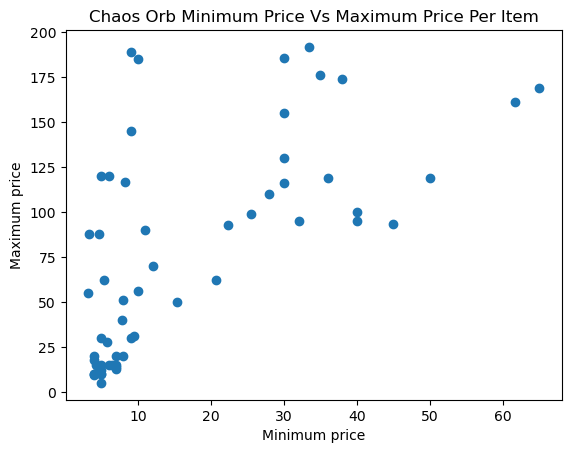

In [184]:
plt.scatter(min_necro["Value"]["min"], min_necro["Value"]["max"])
plt.xlabel("Minimum price")
plt.ylabel("Maximum price")
plt.title("Chaos Orb Minimum Price Vs Maximum Price Per Item")

In [187]:
divine_orb = grouped_necro[grouped_necro["Get"].isin(["Divine Orb"])]
divine_orb

,Date,Get,Pay,Value
4089,2024-03-29,Divine Orb,Chaos Orb,38.0
4090,2024-03-30,Divine Orb,Chaos Orb,88.0
4091,2024-03-31,Divine Orb,Chaos Orb,108.0
4092,2024-04-01,Divine Orb,Chaos Orb,137.0
4093,2024-04-02,Divine Orb,Chaos Orb,143.0
...,...,...,...,...
4201,2024-07-19,Divine Orb,Chaos Orb,120.0
4202,2024-07-20,Divine Orb,Chaos Orb,120.0
4203,2024-07-21,Divine Orb,Chaos Orb,120.0
4204,2024-07-22,Divine Orb,Chaos Orb,120.0


Text(0.5, 1.0, 'Chaos Orb Value Per Single Divine Orb Through Necropolis League')

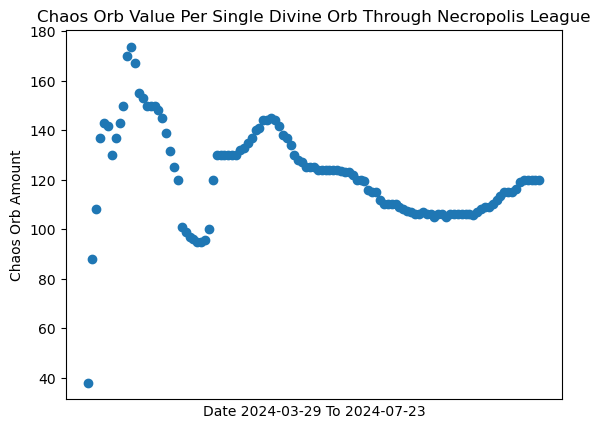

In [209]:
plt.scatter(divine_orb["Date"], divine_orb["Value"])
plt.xticks([])
plt.xlabel("Date 2024-03-29 To 2024-07-23")
plt.ylabel("Chaos Orb Amount")
plt.title("Chaos Orb Value Per Single Divine Orb Through Necropolis League")
